In [1]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
#load du dataset
#
from scipy.io import arff
import pandas as pd

data = arff.loadarff('IanArffDataset.arff')
df = pd.DataFrame(data[0])


In [3]:
#déjà on observe qu'il y a des valeurs Nan

#ici on passe certaines colonnes bytes en integer
df['command response'] = pd.to_numeric(df['command response'])
df['binary result'] = pd.to_numeric(df['binary result'])
df['categorized result'] = pd.to_numeric(df['categorized result'])
df['specific result'] = pd.to_numeric(df['specific result'])

In [4]:
df = df.fillna(0) #on remplace les Nan par 0

In [5]:
is_infini = np.isinf(df)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = df[row_has_infini]

In [6]:

#####################
#####################
#####################
#on passe à un scaler QuantileTransformer
#####################
#####################
#####################
dfs = df.copy()
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution = "normal")
dfs_x = dfs.drop(['categorized result','specific result','binary result'],axis=1)
dfs[dfs.columns.values[:-3]] = scaler.fit_transform(dfs_x)

In [7]:
dfs.drop(['categorized result','specific result','binary result'],axis=1).columns

Index(['address', 'function', 'length', 'setpoint', 'gain', 'reset rate',
       'deadband', 'cycle time', 'rate', 'system mode', 'control scheme',
       'pump', 'solenoid', 'pressure measurement', 'crc rate',
       'command response', 'time'],
      dtype='object')

0.9451258367369232
[0.96511655 0.87146756]
accuracy score, f1, and precision
0.9451258367369232
0.8714675612668448
0.8928925138362948


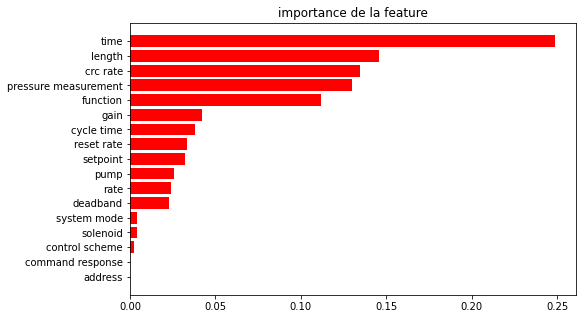

In [8]:
#####################################################################################
##################################################################################### test de classif sans scaler
#####################################################################################
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = df.sample(frac=0.4)
data_test = df.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)





from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),df.columns[indices])
plt.title("importance de la feature")

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

#####################################################################################
#####################################################################################

0.943693598014286
[0.96443139 0.86496085]
accuracy score, f1, and precision
0.943693598014286
0.8649608476697814
0.9074362498091312


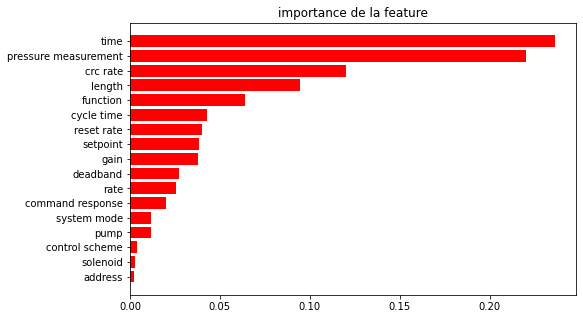

In [16]:
#####################################################################################
##################################################################################### test de classif sans scaler !!
#####################################################################################
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = df.sample(frac=0.4)
data_test = df.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)



from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),df.columns[indices])
plt.title("importance de la feature")

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

#####################################################################################
#####################################################################################

In [ ]:
#les résultats sont bons, meme sans scaler

0.978097671398314
[0.98601754 0.94948562]
accuracy score, f1, and precision
0.978097671398314
0.9494856183077892
0.9564604365236027


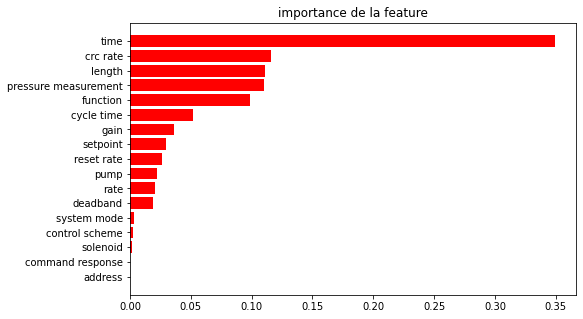

In [8]:
#####################################################################################
##################################################################################### test de classif  scaler quantile
#####################################################################################


from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = dfs.sample(frac=0.4)
data_test = dfs.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)





from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),df.columns[indices])
plt.title("importance de la feature")

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))
#####################################################################################
#####################################################################################

In [ ]:
# on gagne quelques points avec l'utilisation du scaler

In [ ]:
#on faut des autres tests avec les données après le scaler quantile 

In [9]:

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = dfs.sample(frac=0.7)
data_test = dfs.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)


In [19]:
from sklearn import tree
model = ensemble.RandomForestClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

0.9807738991115211
[0.98778061 0.95493086]
accuracy score, f1, and precision
0.9807738991115211
0.9549308598418027
0.9804849547180835


In [63]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9083604408408992
[0.94458065 0.73547754]


In [64]:
from sklearn import tree
model = GradientBoostingClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8943535466330048
[0.93672211 0.6802821 ]


In [65]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9695343982133321
[0.98082418 0.92591937]


In [21]:
from sklearn.ensemble import  ExtraTreesClassifier 
modelerf =  ExtraTreesClassifier()
modelerf.fit(X_train,  Y_train)

y_dct = modelerf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_dct)

0.982461038015245
[0.98883972 0.959064  ]
accuracy score, f1, and precision
0.982461038015245
0.9590639961471996
0.9802524901552003
accuracy score, f1, and precision
0.982461038015245
0.9590639961471996
0.9802524901552003


In [10]:
from sklearn.ensemble import  ExtraTreesClassifier # retenu pour publication
modelerf =  ExtraTreesClassifier()
modelerf.fit(X_train,  Y_train)

y_dct = modelerf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_dct)

0.9822789726659222
[0.9887337  0.95850622]
accuracy score, f1, and precision
0.9822789726659222
0.9585062240663901
0.9804639804639804


array([[64065,   336],
       [ 1124, 16863]])

In [11]:
336/(336+64065) #faux positifs

0.005217310290212885

In [10]:
from sklearn.ensemble import  ExtraTreesClassifier # retenu pour publication
modelerf =  ExtraTreesClassifier()
modelerf.fit(X_train,  Y_train)

y_dct = modelerf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_dct)

0.9817813273777735
[0.98840882 0.95745585]
accuracy score, f1, and precision
0.9817813273777735
0.957455854425895
0.979187199257928


array([[63997,   359],
       [ 1142, 16890]])

In [12]:
359/(359+63997)

0.005578345453415377

In [11]:

y_dct = modelerf.predict(X_train)

print(accuracy_score(Y_train, y_dct))
print(f1_score(Y_train, y_dct))
print(precision_score(Y_train, y_dct))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_dct)

1.0
1.0
1.0


array([[150224,      0],
       [     0,  42016]])

In [16]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8832300624480358
[0.93037478 0.63834746]


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=25)  ),
     ('hist', ExtraTreesClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('aba',  AdaBoostClassifier() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))


print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 14.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.0s finished


0.987874447735107
[0.99224806 0.97217658]
accuracy score, f1, and precision
0.987874447735107
0.9721765770784013
0.9764462347543919


In [13]:
# meme chose mais j'ai oublié la confuxion maxtrix
# retenu pour publication
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=25)  ),
     ('hist', ExtraTreesClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('aba',  AdaBoostClassifier() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))


print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_dct))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.3s finished


0.9882992668835268
[0.99250692 0.97331414]
accuracy score, f1, and precision
0.9882992668835268
0.9733141401838112
0.9717001989829759
[[63844   512]
 [  452 17580]]


In [14]:
512/(512+63811) #faux positif rate

0.00795982774435272

In [15]:

y_dct = clf.predict(X_train)

print(accuracy_score(Y_train, y_dct))
print(f1_score(Y_train, y_dct))
print(precision_score(Y_train, y_dct))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_dct)

0.9998335414065751
0.9996190476190476
1.0


array([[150224,      0],
       [    32,  41984]])

In [ ]:
###########################################
# outliers avec scaler quantile normal

In [12]:
data_train = df.sample(frac=0.7)
data_test = df.drop(data_train.index)




#méthode pour calculer des résultats avec les algos de outlier detection

#on fit le modèle

#on prédit que des valeurs dont on sait quelles sont normales
# le modèle doit donc sortir que des  1 (non-attaque)

#on prédit que des valeurs dont on sait quelles sont des attaques
# le modèle doit donc sortir que des  -1 (attaque)




In [8]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=60, novelty=True, contamination='auto').fit(data_train[data_train['binary result'] == 0 ].drop(['binary result', 'categorized result',
       'specific result'],axis=1))

res = clf.predict(data_test[data_test['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs normales")
print(pd.Series(res).value_counts())

res = clf.predict(data_test[data_test['binary result'] == 1 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs Anormales")
print(pd.Series(res).value_counts())


prédiction valeurs normales
 1    57451
-1     6806
dtype: int64
prédiction valeurs Anormales
 1    13378
-1     4753
dtype: int64


In [ ]:
# détecte seulement 30% des attaques, c'est nul

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=15, novelty=True, contamination='auto',metric = 'hamming').fit(data_train[data_train['binary result'] == 0 ].drop(['binary result', 'categorized result',
       'specific result'],axis=1))

res = clf.predict(data_test[data_test['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs normales")
print(pd.Series(res).value_counts())

res = clf.predict(data_test[data_test['binary result'] == 1 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs Anormales")
print(pd.Series(res).value_counts())


In [ ]:
#ne fonctionne pas

In [6]:
dfsmaller =  df.sample(frac=0.2)
data_train = dfsmaller.sample(frac=0.7)
data_test = dfsmaller.drop(data_train.index)


In [7]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM 


clf = OneClassSVM( kernel="rbf").fit(data_train[data_train['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1))

res = clf.predict(data_test[data_test['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs normales")
print(pd.Series(res).value_counts())

res = clf.predict(data_test[data_test['binary result'] == 1 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs Anormales")
print(pd.Series(res).value_counts())

prédiction valeurs normales
-1    9186
 1    3725
dtype: int64
prédiction valeurs Anormales
-1    2653
 1     914
dtype: int64


In [8]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope( contamination=0.0).fit(data_train[data_train['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1).sample(frac=0.5))

res = clf.predict(data_test[data_test['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs normales")
print(pd.Series(res).value_counts())

res = clf.predict(data_test[data_test['binary result'] == 1 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs Anormales")
print(pd.Series(res).value_counts())


/usr/local/lib64/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


prédiction valeurs normales
1    12911
dtype: int64
prédiction valeurs Anormales
 1    2722
-1     845
dtype: int64


In [ ]:
#fonctionne très mal

In [9]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest( contamination='auto').fit(data_train[data_train['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1).sample(frac=0.5))

res = clf.predict(data_test[data_test['binary result'] == 0 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs normales")
print(pd.Series(res).value_counts())

res = clf.predict(data_test[data_test['binary result'] == 1 ].drop(['binary result', 'categorized result','specific result'],axis=1))
print("prédiction valeurs Anormales")
print(pd.Series(res).value_counts())


prédiction valeurs normales
 1    7713
-1    5198
dtype: int64
prédiction valeurs Anormales
-1    1845
 1    1722
dtype: int64


In [ ]:
#fonctionne mal

In [ ]:
#les scores avec les Novelty detection algoritms ne sont pas bons

In [ ]:
########################################################################################################################
########################################################################################################################
###################################################################### meme chose avec minmax scaler
########################################################################################################################
########################################################################################################################

In [14]:
############################   on normalise les données avec minmaxscaler cette fois ci

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x = df.drop(['binary result','categorized result','specific result'],axis=1)
df[df.columns.values[:-3]] = scaler.fit_transform(df_x)

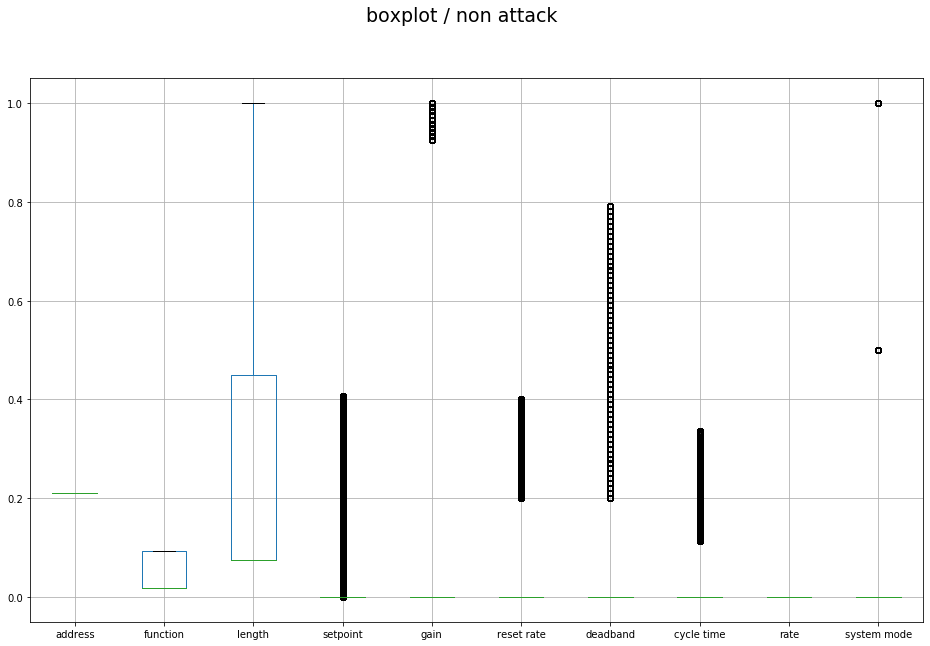

In [19]:
plt.figure(figsize=(16,10))
plt.suptitle('boxplot / non attack',fontsize=19)
normal = df[df['binary result']==0][df.columns.values[:-10]]
normal.boxplot( )


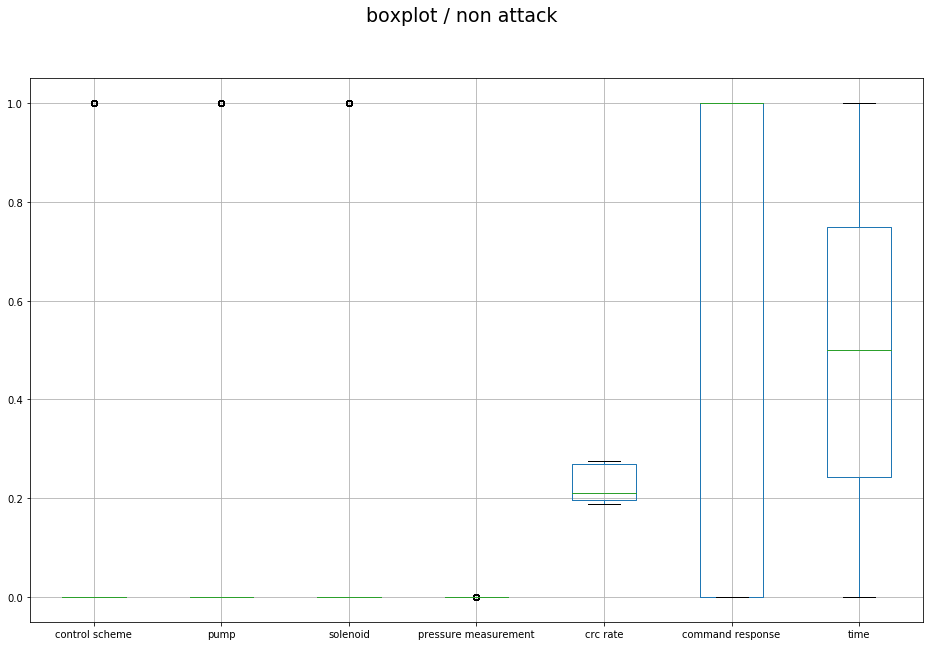

In [20]:
plt.figure(figsize=(16,10))
plt.suptitle('boxplot / non attack',fontsize=19)
normal = df[df['binary result']==0][df.columns.values[-10:-3]]
normal.boxplot( )


In [ ]:
#le scaler min max n'est pas le meilleur pour les outliers présents dans le dataset

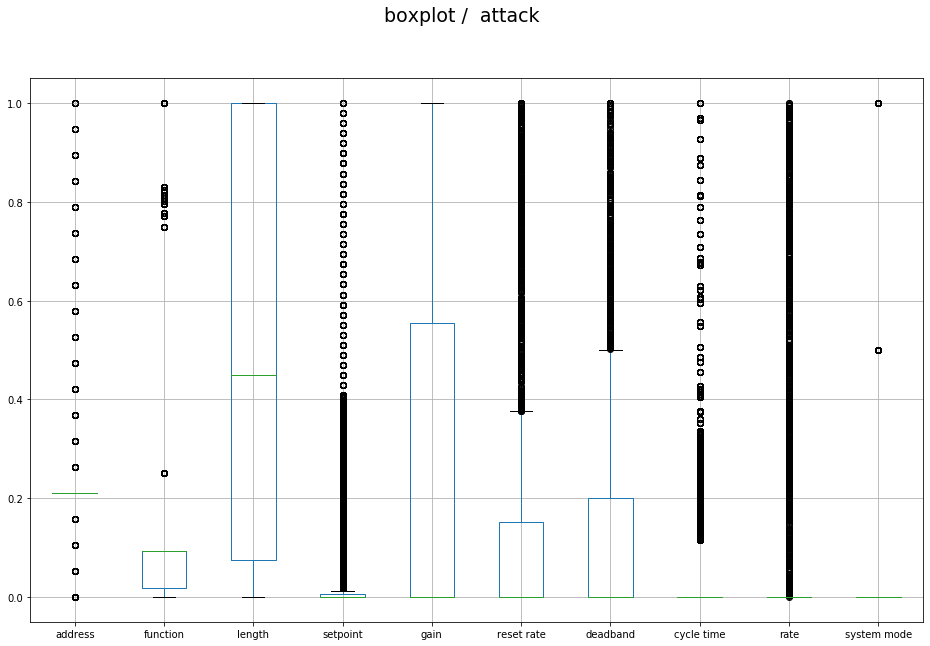

In [21]:
plt.figure(figsize=(16,10))
plt.suptitle('boxplot /  attack',fontsize=19)
normal = df[df['binary result']==1][df.columns.values[:-10]]
normal.boxplot( )


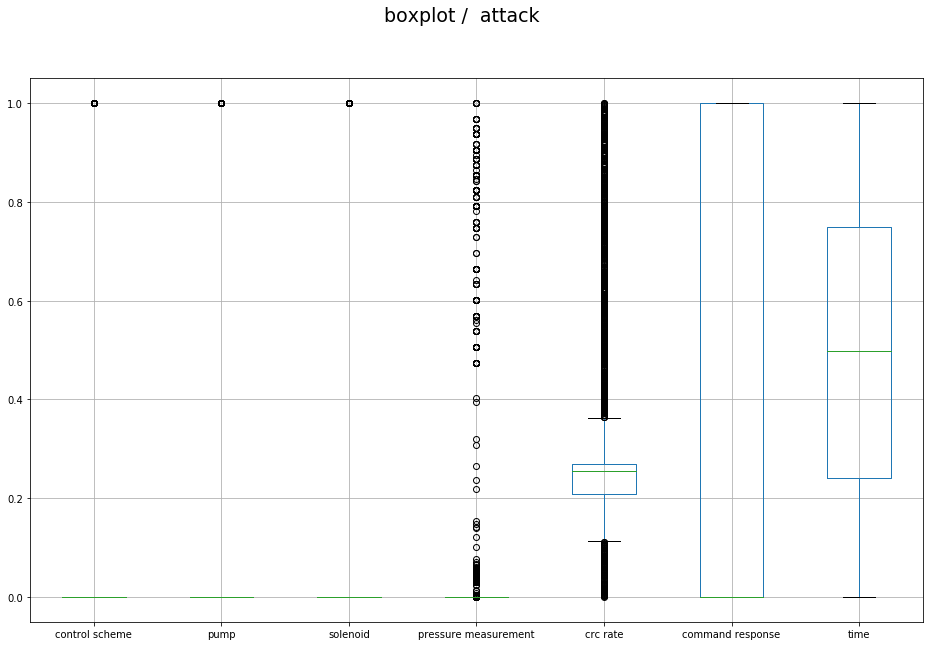

In [23]:
plt.figure(figsize=(16,10))
plt.suptitle('boxplot /  attack',fontsize=19)
normal = df[df['binary result']==1][df.columns.values[-10:-3]]
normal.boxplot( )


In [16]:
#répartition attaque /normal

In [18]:
print(pd.Series(df['binary result']).value_counts())

0    214580
1     60048
Name: binary result, dtype: int64


In [ ]:
## la variable deadband en fonction de la variable cycle time

<Figure size 1080x360 with 0 Axes>

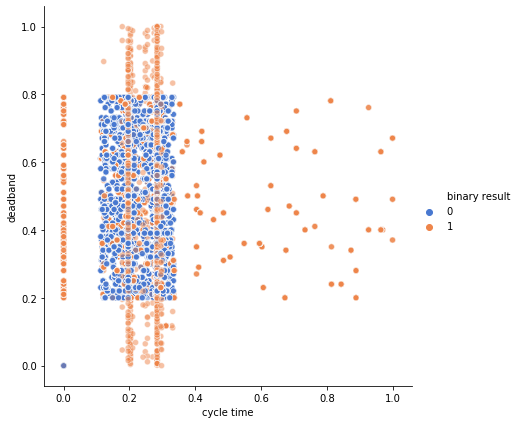

In [137]:
plt.figure(figsize=(15,5))
plt.suptitle(' scatterplot  bleu:normal / orange:anormal' ,fontsize=19)

sns.relplot(x="cycle time", y="deadband", hue="binary result", alpha=.5, palette="muted",
            height=6, data=df)
plt.show()


###      scatterplot  bleu:normal / orange:anormal

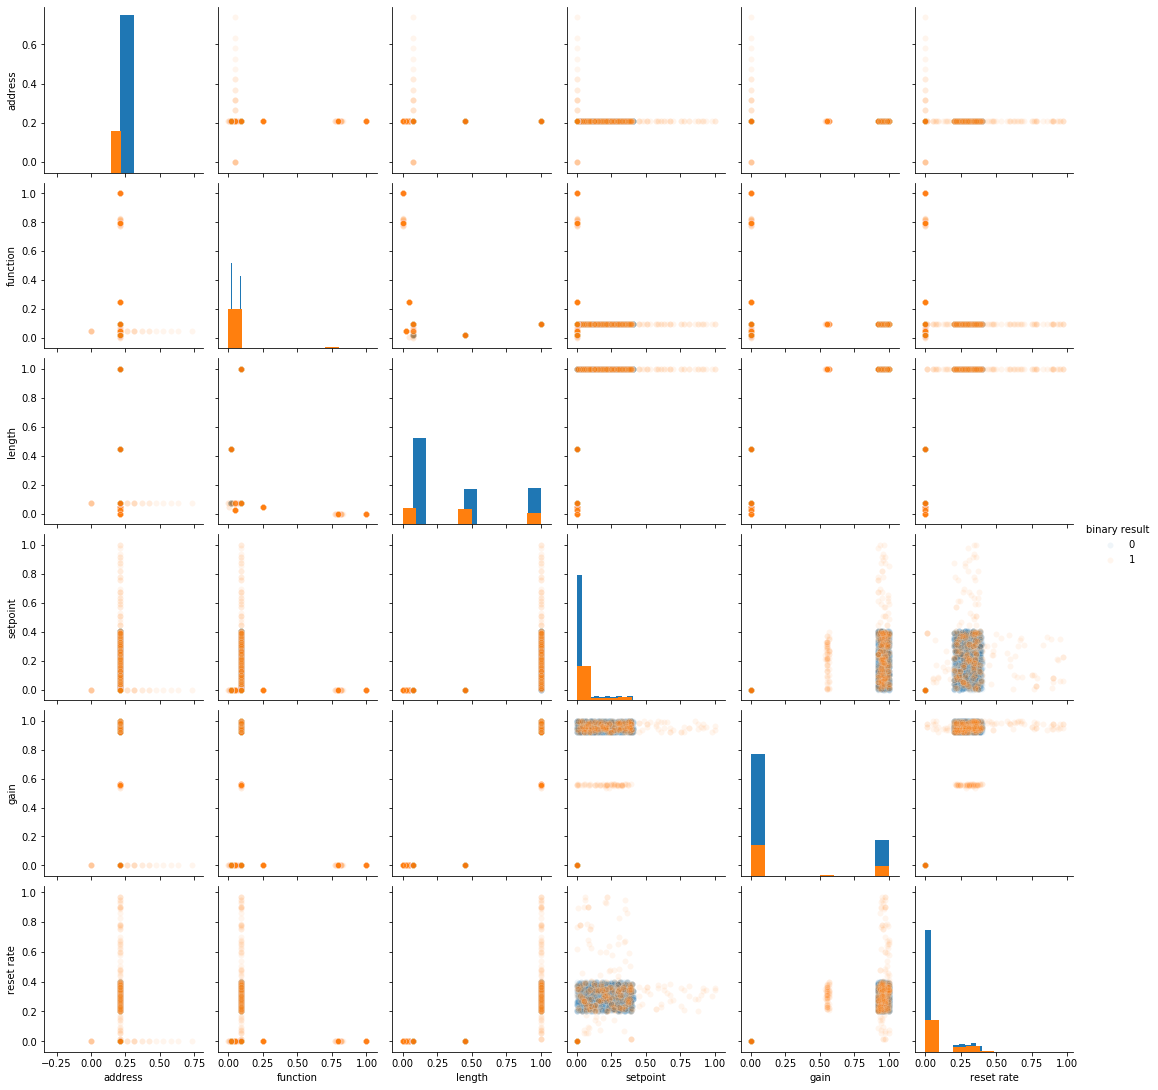

In [127]:
data =df.sample(frac=0.2)
sns.pairplot(data.sample(frac=0.2).drop(['categorized result','specific result'],axis=1)[data.columns.values[[0,1,2,3,4,5,17]]],diag_kind='hist',hue='binary result',plot_kws={'alpha':0.07})

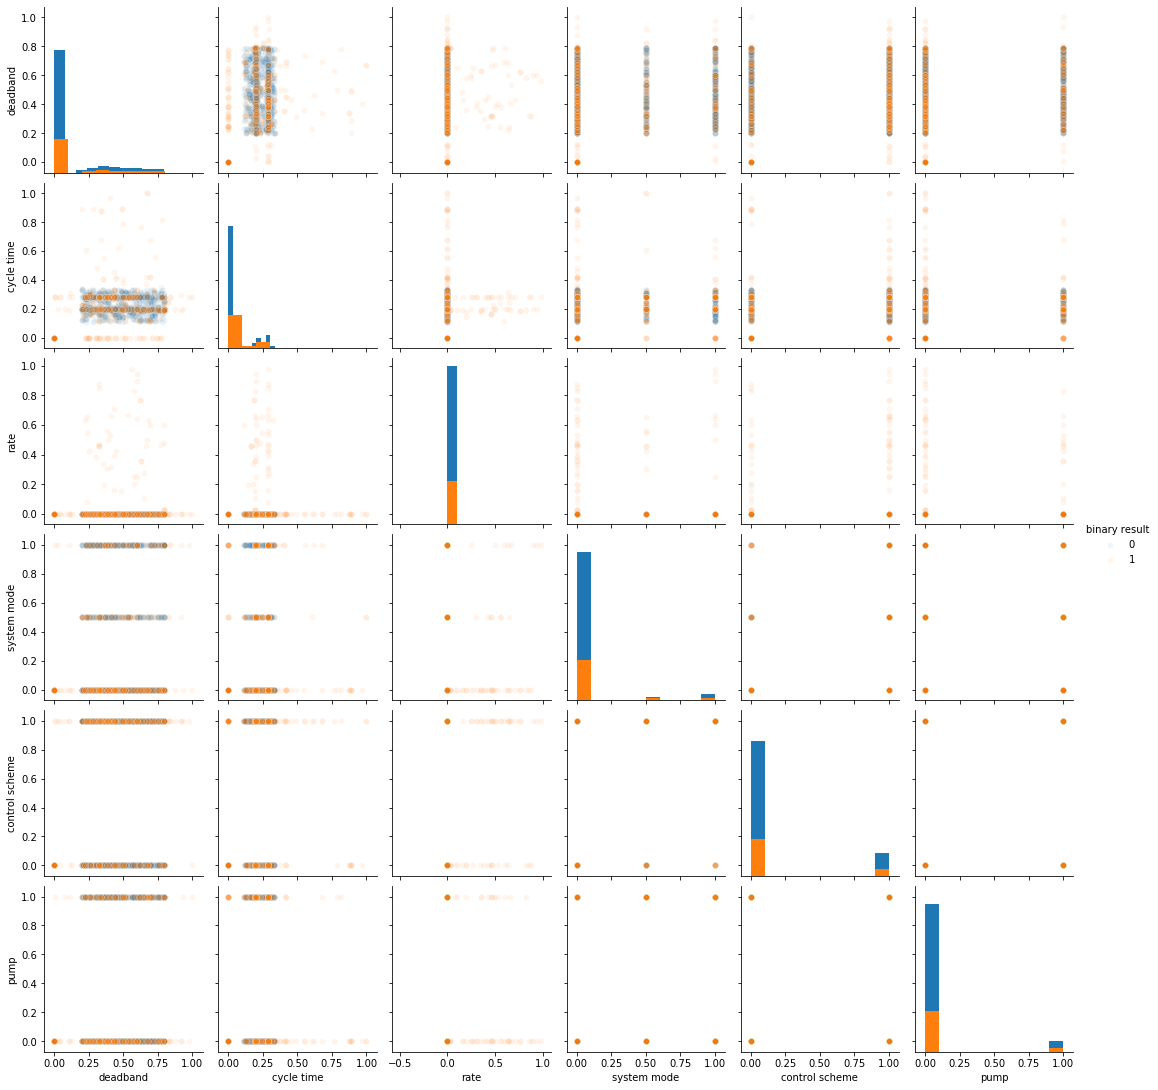

In [128]:
data =df.sample(frac=0.2)
sns.pairplot(data.sample(frac=0.2).drop(['categorized result','specific result'],axis=1)[data.columns.values[[6,7,8,9,10,11,17]]],diag_kind='hist',hue='binary result',plot_kws={'alpha':0.07})

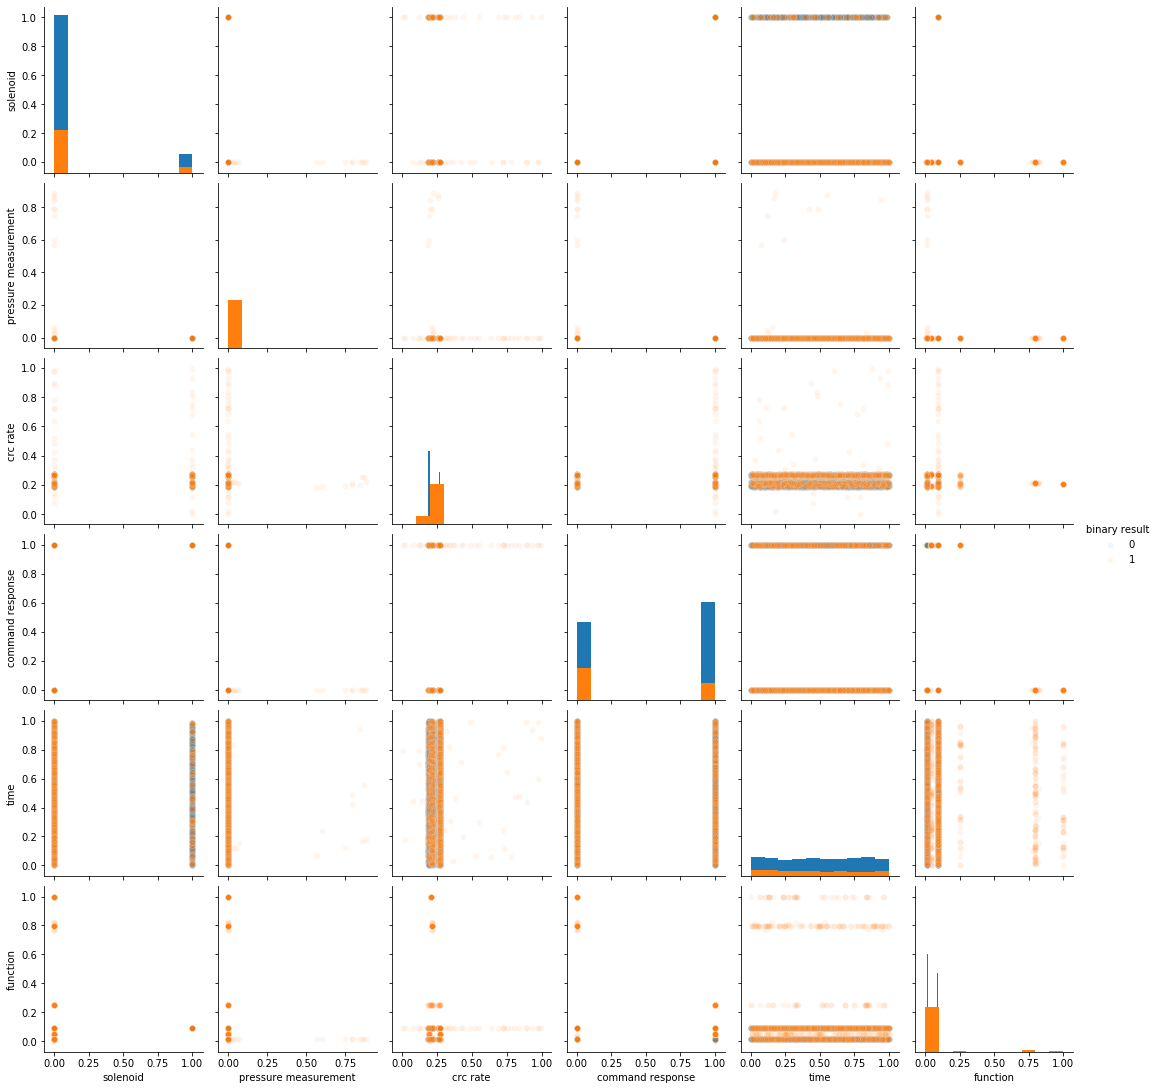

In [129]:
data =df.sample(frac=0.2)
sns.pairplot(data.sample(frac=0.2).drop(['categorized result','specific result'],axis=1)[data.columns.values[[12,13,14,15,16,1,17]]],diag_kind='hist',hue='binary result',plot_kws={'alpha':0.07})

In [ ]:
#pas de différences notable avec le Quantile scaler

In [ ]:
############################################################################################
## test de classif  avec minmax scaler

In [16]:

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = df.sample(frac=0.4)
data_test = df.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)


In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9508180803029568
[0.96878803 0.88407621]


Text(0.5, 1.0, 'importance de la feature')

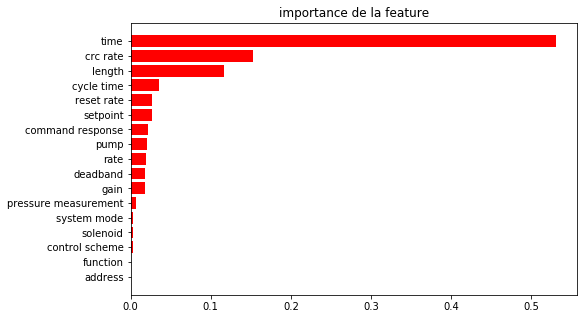

In [37]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),df.columns[indices])
plt.title("importance de la feature")

In [60]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9505389134339952
[0.96850972 0.88479263]


In [ ]:
#c'est mieux que sans scaler mais moins bien que avec le quantile scaler

In [38]:
from sklearn import tree
model = ensemble.RandomForestClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9388745933873865
[0.96152377 0.85140159]


Text(0.5, 1.0, 'importance de la feature')

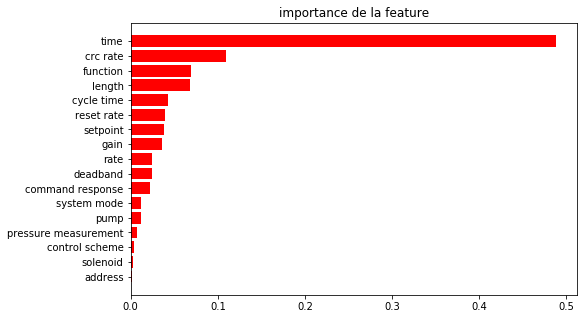

In [39]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),df.columns[indices])
plt.title("importance de la feature")

In [144]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9068917803563625
[0.94368462 0.73141697]


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=300,loss='binary_crossentropy')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=300,loss='categorical_crossentropy')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

In [67]:
from sklearn.ensemble import  ExtraTreesClassifier
modelerf =  ExtraTreesClassifier()
modelerf.fit(X_train,  Y_train)

y_dct = modelerf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9413749575180852
[0.96276711 0.86220472]


In [ ]:

from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

In [21]:
from sklearn import tree
model = GradientBoostingClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8519089436025659
[0.91336855 0.49032959]


In [62]:
from sklearn import tree
model = GradientBoostingClassifier(loss='exponential')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8500752536777201
[0.91244684 0.47873059]


In [65]:
from sklearn import tree
model = GradientBoostingClassifier(learning_rate=0.5)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8675656649026557
[0.92150303 0.57671568]


In [66]:
from sklearn import tree
model = GradientBoostingClassifier(max_depth=10)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8828955673156285
[0.93019116 0.6368837 ]


In [70]:
from sklearn import tree
model = GradientBoostingClassifier(max_depth=20)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9637811331747342
[0.97720153 0.91195043]


In [68]:
from sklearn.ensemble import  ExtraTreesClassifier
modelerf =  ExtraTreesClassifier()
modelerf.fit(X_train,  Y_train)

y_dct = modelerf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))



from sklearn import tree
model = GradientBoostingClassifier(init=modelerf)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.940913725299801
[0.96247649 0.86108892]
0.9407316599504782
[0.96279477 0.85437356]


In [ ]:
from sklearn import tree
model = SVC(cache_size=1000,gamma='auto')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

In [26]:
#ne fonctionne pas
from sklearn import tree
model = GaussianProcessClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

MemoryError: Unable to allocate 89.9 GiB for an array with shape (109851, 109851) and data type float64

In [25]:
from sklearn import tree
model = GaussianNB()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8065385338973279
[0.88975349 0.21097965]


In [24]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8365791342238298
[0.90525049 0.40624449]


In [22]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(20,20,20),max_iter=1500)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8510835856946054
[0.91288511 0.48751044]


In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(8,8,8),max_iter=1500)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8467201126370792
[0.91051899 0.46594633]


In [ ]:
#13 05 2020

In [19]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=1500,activation='tanh')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8497241726697294
[0.91205802 0.48393147]


In [20]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=1500,activation='identity')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8165035168743211
[0.89392961 0.32050879]


In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=1500,activation='logistic')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))



0.8447477499893796
[0.90930427 0.46131817]


In [22]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=1500,activation='relu')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8497545167104632
[0.91207858 0.48393888]


In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=1500,activation='tanh',solver='sgd')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8440741122850883
[0.90892463 0.45849053]


In [24]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=1500,activation='tanh',solver='lbfgs')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8489898468839705
[0.91165182 0.48059782]


In [33]:

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = df.sample(frac=0.7)
data_test = df.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)


In [27]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,validation_fraction=0.4,learning_rate_init=0.01)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.849529057629752
[0.91208986 0.47817485]


In [28]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(102,102),max_iter=2000,activation='relu',early_stopping = True,validation_fraction=0.4,learning_rate_init=0.01)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8514832257124824
[0.9131632  0.48734708]


In [29]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(200,200),max_iter=2000,activation='relu',early_stopping = True,validation_fraction=0.4,learning_rate='adaptive')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8591056950041268
[0.91718982 0.52813008]


In [34]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(200,200,50),max_iter=3000,activation='relu',early_stopping = True,validation_fraction=0.5,learning_rate_init=0.01)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8524056901490509
[0.91365353 0.49223317]


In [30]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.05,validation_fraction=0.4,learning_rate_init=0.001)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8460819536825751
[0.91022364 0.46095643]


In [31]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8476234403068408
[0.91107176 0.46818605]


In [32]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.0005,validation_fraction=0.4,learning_rate_init=0.001)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8481574986648541
[0.91130679 0.47277478]


In [33]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.00005,validation_fraction=0.4,learning_rate_init=0.001)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8479511579356217
[0.91124604 0.46993611]


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() )
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9692190050795925
[0.98036012 0.92886795]


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',  MLPClassifier (hidden_layer_sizes =(8,8,8),max_iter=1500) )
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9688852206315202
[0.98015383 0.92800876]


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9760280623391756
[0.98472958 0.94427358]


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=tree.DecisionTreeClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9446764091858038
[0.96428739 0.877295  ]


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=HistGradientBoostingClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9763800553478662
[0.98496461 0.94494738]


In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(12,12,12),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=SVC(cache_size=1000,gamma='auto')
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9745108510948196
[0.98379505 0.94031717]


In [39]:
from sklearn.ensemble import  ExtraTreesClassifier
model =  ExtraTreesClassifier(n_estimators = 200)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9420546681555566
[0.96320787 0.8636779 ]


In [42]:
from sklearn.ensemble import  ExtraTreesClassifier
model =  ExtraTreesClassifier(n_estimators = 600)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9424916249939311
[0.96346616 0.86496808]


In [40]:
from sklearn.ensemble import  ExtraTreesClassifier
model =  ExtraTreesClassifier(criterion= 'entropy')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9426008642035247
[0.96354315 0.86512079]


In [41]:
from sklearn.ensemble import  ExtraTreesClassifier
model =  ExtraTreesClassifier(max_features = None)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9418483274263242
[0.96305721 0.86346148]


In [43]:
from sklearn.naive_bayes import BernoulliNB
model =BernoulliNB()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.802398407535078
[0.88774581 0.17561272]


In [44]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.7849686847599165
[0.87904195 0.03254696]


In [45]:
from sklearn.naive_bayes import ComplementNB
model =ComplementNB()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.5091275428460456
[0.56873827 0.43039437]


In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.7872262950915182
[0.8801597  0.05232998]


In [47]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9474195271155994
[0.96663072 0.87607278]


In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9511822110016022
[0.96942375 0.87898664]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.934687090352964
[0.95872865 0.84355284]


In [50]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9264334611836675
[0.95374306 0.82039885]


In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9177428751759965
[0.94897952 0.78786741]


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(16,16,16),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001) ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=HistGradientBoostingClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9799970869544108
[0.98724478 0.95367403]


In [23]:
#14052020

from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier()  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier() ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(16,16,16),max_iter=2000,activation='relu',early_stopping = True,alpha=0.005,validation_fraction=0.4,learning_rate_init=0.001) ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=HistGradientBoostingClassifier()
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9789411079283391
[0.98656278 0.95134195]


In [ ]:
#14052020

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=20)  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(class_weight='balanced') ),
    ('mlp',   MLPClassifier (hidden_layer_sizes =(16,16,16),max_iter=2000,activation='relu',early_stopping = True,validation_fraction=0.4,learning_rate='adaptive') ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=HistGradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 22.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.7min finished


0.9847793367966209
[0.99024033 0.96544312]


In [ ]:
#98,4 pas mal

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=20)  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced') ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.6min finished


0.9839782492596009
[0.98974694 0.96336793]


In [29]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=3000)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.8134679807738991
[0.89343171 0.25281991]


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
model = RadiusNeighborsClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

In [ ]:
from sklearn.multioutput import MultiOutputClassifier

model = RadiusNeighborsClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import ComplementNB
estimators = [
     ('erf', GradientBoostingClassifier(max_depth=25)  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')  ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('cnb',  ComplementNB() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=HistGradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 28.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


0.984123901539059
[0.989894   0.96299649]


In [35]:
#
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=25)  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')  ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('cnb',  ComplementNB() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(max_depth=25),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 27.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


0.9777637520027188
[0.98584235 0.94821348]


In [ ]:
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################

In [ ]:
#### si on remplace les Nan par valeur moyenne + aléatoire

# => ne boost pas les scores

In [22]:

#https://sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets
from scipy.io import arff
import pandas as pd

data = arff.loadarff('IanArffDataset.arff')
df = pd.DataFrame(data[0])


In [23]:
df['command response'] = pd.to_numeric(df['command response'])
df['binary result'] = pd.to_numeric(df['binary result'])
df['categorized result'] = pd.to_numeric(df['categorized result'])
df['specific result'] = pd.to_numeric(df['specific result'])

In [24]:
df['setpoint'].mean()

10.535522776911076

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x = df.drop(['binary result','categorized result','specific result'],axis=1)
df[df.columns.values[:-3]] = scaler.fit_transform(df_x)

In [26]:
df.isnull().sum(axis = 0)

address                      0
function                     0
length                       0
setpoint                210528
gain                    210528
reset rate              210528
deadband                210528
cycle time              210528
rate                    210528
system mode             210528
control scheme          210528
pump                    210528
solenoid                210528
pressure measurement    205740
crc rate                     0
command response             0
time                         0
binary result                0
categorized result           0
specific result              0
dtype: int64

In [27]:

for col in df.columns.values[:-3]:
    #print(df[col].mean())
    df[col] = df[col].fillna(df[col].mean() + np.random.rand(1)[0]/10 - np.random.rand(1)[0]/10)

In [28]:
df.isnull().sum(axis = 0)

address                 0
function                0
length                  0
setpoint                0
gain                    0
reset rate              0
deadband                0
cycle time              0
rate                    0
system mode             0
control scheme          0
pump                    0
solenoid                0
pressure measurement    0
crc rate                0
command response        0
time                    0
binary result           0
categorized result      0
specific result         0
dtype: int64

In [29]:

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

data_train = df.sample(frac=0.7)
data_test = df.drop(data_train.index)

Y_train = data_train['binary result']
X_train = data_train.drop(['categorized result','specific result','binary result'],axis=1)


Y_test = data_test['binary result']
X_test = data_test.drop(['categorized result','specific result','binary result'],axis=1)


In [90]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9497985143467496
[0.96804253 0.88301182]


In [ ]:
#score moins bon que lorsque on remplace les nan par 0

In [91]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9502111958052144
[0.96830425 0.88398665]


In [92]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

0.9516555809098413
[0.96974255 0.87980929]


In [94]:
#
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')  ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('cnb',  ComplementNB() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


0.9764407437976405
[0.98495384 0.9457412 ]


In [31]:
#
from sklearn.neural_network import MLPClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import ComplementNB

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=25)  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')  ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('cnb',  ComplementNB() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


0.9856168374035054
[0.99079204 0.96715905]


In [32]:
print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

accuracy score, f1, and precision
0.9856168374035054
0.967159049968129
0.9710612721909956


In [95]:
#
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', GradientBoostingClassifier(max_depth=25)  ),
     ('hist', HistGradientBoostingClassifier() ),
    ('knn',  tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')  ),
    ('kcc',  KNeighborsClassifier(n_neighbors=2) ),
    ('cnb',  ComplementNB() )
    
    
    
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier(),verbose=True
)


clf.fit(X_train,  Y_train)

y_dct = clf.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))


print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(Y_test, y_dct))
print(f1_score(Y_test, y_dct))
print(precision_score(Y_test, y_dct))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 27.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


0.9850342282856727
[0.9904366  0.96560382]
